In [12]:
import pandas as pd
import numpy as np
import nltk
from tqdm import tqdm
import time
import string
from scipy.linalg import svd
import scipy as sp

In [4]:
from matplotlib import pyplot as plt

In [4]:
Cell_Phones_and_Accessories = pd.read_json('./data/reviews_Cell_Phones_and_Accessories_5.json', lines=True)

In [13]:

results = []
wnl = nltk.stem.WordNetLemmatizer()
with tqdm(total=len(Cell_Phones_and_Accessories)) as pbar:
    for review in Cell_Phones_and_Accessories.iloc[:,3].iteritems():
        sentences = nltk.sent_tokenize(review[1])
        for i in range(len(sentences)):
            sentences[i] = sentences[i].lower()
            for punc in string.punctuation:
                sentences[i] = sentences[i].replace(punc, ' ')
        words = sum([nltk.word_tokenize(sentence) for sentence in sentences],[])
        lemmas = [wnl.lemmatize(word) for word in words]
        results.append(lemmas)
        pbar.update(1)


100%|██████████| 194439/194439 [04:26<00:00, 729.52it/s]


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
def my_tokenizer(document):
    wnl = nltk.stem.WordNetLemmatizer()
    sentences = nltk.sent_tokenize(document)
    for i in range(len(sentences)):
        sentences[i] = sentences[i].lower()
        for punc in string.punctuation:
            sentences[i] = sentences[i].replace(punc, ' ')
    words = sum([nltk.word_tokenize(sentence) for sentence in sentences],[])
    return [wnl.lemmatize(word) for word in words]

In [15]:
stopwords=[]
with open('stopwords.txt') as file:
    for line in file.readlines():
        stopwords.append(line.strip())
        
vectorizer = TfidfVectorizer(input='content', 
                             tokenizer=my_tokenizer, 
                             stop_words=stopwords, max_features=None, 
                            max_df=0.9)
X= vectorizer.fit_transform(Cell_Phones_and_Accessories.iloc[:,3])

In [41]:
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn import random_projection as rp

In [42]:
rating = Cell_Phones_and_Accessories.iloc[:,2]
n_training = int(round(0.66 * np.shape(X)[0]))
srp = rp.SparseRandomProjection(n_components = 700)
new = srp.fit_transform(X,rating)
dtc = dtc()
dtc.fit(new[:n_training], rating[:n_training])
predictions = dtc.predict(new[n_training:])
print(np.shape(new))
predictions = dtc.predict(new[n_training:])
print(np.mean(abs(predictions-rating[n_training:])))

(194439, 700)
0.950959778548


0.982468347729


In [25]:
np.save('fulltfidf',X)

In [15]:
np.save('tfidfvec', X)
np.savetxt('tfidfvec.csv', X.todense(), delimiter = ',')  

In [19]:
np.load('tfidfvec.npy')

array(<194439x1000 sparse matrix of type '<type 'numpy.float64'>'
	with 5741018 stored elements in Compressed Sparse Row format>, dtype=object)

In [17]:
ratings = np.array(Cell_Phones_and_Accessories.iloc[:,2])
np.savetxt('ratings_for_tfidfvec.csv', ratings, delimiter = ',')  

In [2]:
from os.path import expanduser
from nltk.tag.stanford import StanfordPOSTagger
home = expanduser("~")
_path_to_model = home + '/stanford-postagger/models/english-bidirectional-distsim.tagger'
_path_to_jar = home + '/stanford-postagger/stanford-postagger.jar'
st = StanfordPOSTagger(model_filename=_path_to_model, path_to_jar=_path_to_jar)

In [16]:
Cell_Phones_and_Accessories.iloc[123,3]

u'Good charger and is perfect because it is also has a USB connection. Also love that it is original material it works like that too giving a quick charge when i need it.'

In [4]:
d=np.loadtxt('tfidfvec.csv', delimiter = ',')  

In [5]:
d_trans=np.transpose(d)
m=np.asmatrix(d_trans)
import gc
m_truncated = m[:,:20000]
m=None
gc.collect()

6

In [6]:
np.shape(m_truncated)

(1000, 20000)

In [14]:
#u,s,vt=svd(m_truncated)
u=None
s=None
vt=None
gc.collect()

136874

In [17]:
from sklearn import decomposition
pca = decomposition.PCA(n_components='mle', copy=True, whiten=False) 
new_m = pca.fit_transform(m_truncated.T)
np.shape(new_m)

(20000, 999)

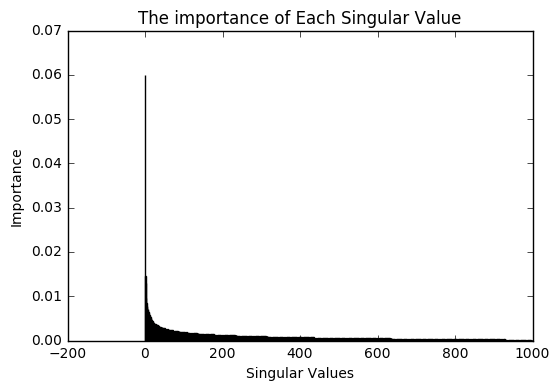

In [13]:
y_value = (s*s)/sum(s*s)
x_value = range(len(y_value))
plt.bar(x_value, y_value, alpha = 1, color = 'g', align="center")
plt.autoscale()
plt.xlabel("Singular Values")
plt.ylabel("Importance")
plt.title("The importance of Each Singular Value")
plt.show()

In [11]:
d1 = np.loadtxt('/afs/inf.ed.ac.uk/user/s16/s1678999/Documents/tfidf/tfidf_1.csv', delimiter = ',')
d2 = np.loadtxt('/afs/inf.ed.ac.uk/user/s16/s1678999/Documents/tfidf/tfidf_2.csv', delimiter = ',')
d3 = np.loadtxt('/afs/inf.ed.ac.uk/user/s16/s1678999/Documents/tfidf/tfidf_3.csv', delimiter = ',')
d4 = np.loadtxt('/afs/inf.ed.ac.uk/user/s16/s1678999/Documents/tfidf/tfidf_4.csv', delimiter = ',')

IOError: [Errno 2] No such file or directory: '/afs/inf.ed.ac.uk/user/s16/s1678999/Documents/tfidf/tfidf_5.csv'

In [13]:
d = np.vstack((d1,d2,d3,d4))

In [16]:
from sklearn import decomposition
pca = decomposition.PCA(n_components='mle', copy=True, whiten=False) 
new_m = pca.fit_transform(m_truncated.T)
np.shape(new_m)

ImportError: cannot import name __check_build